In [ ]:
import numpy as np
import pandas as pd
from statistics import mode
from sklearn.model_selection import train_test_split

for kmeans it takes too much iteration to converge so i have taken 10**4 iteration and tolerance as 1e-3

In [ ]:
df=pd.read_csv("haberman.data",header=None)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       306 non-null    int64
 1   1       306 non-null    int64
 2   2       306 non-null    int64
 3   3       306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [ ]:
print("number of dataset with label 1",df.iloc[:,-1][df.iloc[:,-1]==1].count())
print("number of dataset with label 2",df.iloc[:,-1][df.iloc[:,-1]==2].count())

number of dataset with label 1 225
number of dataset with label 2 81


In [ ]:
print("here sample ratio is",225/305,':',81/305)

here sample ratio is 0.7377049180327869 : 0.26557377049180325


In [ ]:
df.describe()

0           1           2           3
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000

In [ ]:
df=df.to_numpy()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[:,:-1])
df[:,:-1]=scaler.transform(df[:,:-1])

In [ ]:
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 3)
  
df[:,:-1] = pca.fit_transform(df[:,:-1] ) 
explained_variance = pca.explained_variance_ratio_

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[:,:-1],df[:,-1], train_size=0.8, random_state=99)

In [ ]:
with open("haberman.names") as f:
    print(f.read())

1. Title: Haberman's Survival Data

2. Sources:
   (a) Donor:   Tjen-Sien Lim (limt@stat.wisc.edu)
   (b) Date:    March 4, 1999

3. Past Usage:
   1. Haberman, S. J. (1976). Generalized Residuals for Log-Linear
      Models, Proceedings of the 9th International Biometrics
      Conference, Boston, pp. 104-122.
   2. Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984),
      Graphical Models for Assessing Logistic Regression Models (with
      discussion), Journal of the American Statistical Association 79:
      61-83.
   3. Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis,
      Department of Statistics, University of Wisconsin, Madison, WI.

4. Relevant Information:
   The dataset contains cases from a study that was conducted between
   1958 and 1970 at the University of Chicago's Billings Hospital on
   the survival of patients who had undergone surgery for breast
   cancer.

5. Number of Instances: 306

6. Number of Attributes: 4 (including the class attribute)

7. 

In [ ]:
def knnl1(x,y,xp,k):
  distance=[]
  for i in range(len(x)):
    di=np.sum(np.absolute(x[i]-xp))
    distance.append(di)
  ind=np.argsort(distance)[:k]
  return mode(y[ind])

In [ ]:
def knnl2(x,y,xp,k):
  distance=[]
  for i in range(len(x)):
    di=np.sqrt(np.sum((x[i]-xp)**2))
    distance.append(di)
  ind=np.argsort(distance)[:k]
  return mode(y[ind],)

In [ ]:
#lets find label for test data
def predictl1(x_train,y_train,x_test,k):
  y_pred=[]
  for i in range(len(x_test)):
    pred=knnl1(x_train,y_train,x_test[i],k)
    y_pred.append(pred)
  return y_pred

In [ ]:
def predictl2(x_train,y_train,x_test,k):
  y_pred=[]
  for i in range(len(x_test)):
    pred=knnl2(x_train,y_train,x_test[i],k)
    y_pred.append(pred)
  return y_pred

In [ ]:
def accuracyscore(y_test,y_pred):
  score=0
  for i in range(len(y_test)):
    if y_test[i]==y_pred[i]:
      score+=1
  return score/len(y_test)

In [ ]:
for i in [1,2,3,4,5]:
  print("accuracy of k nearest neighbour(l1 norm) for k=",i,'is',accuracyscore(y_test,predictl1(x_train,y_train,x_test,i)))

accuracy of k nearest neighbour(l1 norm) for k= 1 is 0.6774193548387096
accuracy of k nearest neighbour(l1 norm) for k= 2 is 0.6774193548387096
accuracy of k nearest neighbour(l1 norm) for k= 3 is 0.6935483870967742
accuracy of k nearest neighbour(l1 norm) for k= 4 is 0.6774193548387096
accuracy of k nearest neighbour(l1 norm) for k= 5 is 0.7903225806451613


In [ ]:
for i in [1,2,3,4,5]:
  print("accuracy of k nearest neighbour(l2 norm) for k=",i,'is',accuracyscore(y_test,predictl2(x_train,y_train,x_test,i)))

accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.6774193548387096
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.6774193548387096
accuracy of k nearest neighbour(l2 norm) for k= 3 is 0.6935483870967742
accuracy of k nearest neighbour(l2 norm) for k= 4 is 0.6774193548387096
accuracy of k nearest neighbour(l2 norm) for k= 5 is 0.7903225806451613


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3,p=1)
neigh.fit(x_train,y_train)
neigh.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
sc1=[[] for i in range(5)]
for i in [0.8,0.6,0.7,0.9]:
  print("for training and test ratio as ",round(i*100),':',round((1-i)*100))
  x_train, x_test, y_train, y_test = train_test_split(df[:,:-1],df[:,-1], train_size=i, random_state=42)
  for j in [1,2,3,4,5]:
    print("accuracy of k nearest neighbour(l2 norm) for k=",j,'is',accuracyscore(y_test,predictl1(x_train,y_train,x_test,j)))
    sc1[j-1].append(accuracyscore(y_test,predictl1(x_train,y_train,x_test,j)))
sc1=np.transpose(sc1)

for training and test ratio as  80 : 20
accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.7096774193548387
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.7096774193548387
accuracy of k nearest neighbour(l2 norm) for k= 3 is 0.7096774193548387
accuracy of k nearest neighbour(l2 norm) for k= 4 is 0.7096774193548387
accuracy of k nearest neighbour(l2 norm) for k= 5 is 0.7258064516129032
for training and test ratio as  60 : 40
accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.6829268292682927
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.6829268292682927
accuracy of k nearest neighbour(l2 norm) for k= 3 is 0.6829268292682927
accuracy of k nearest neighbour(l2 norm) for k= 4 is 0.6829268292682927
accuracy of k nearest neighbour(l2 norm) for k= 5 is 0.7317073170731707
for training and test ratio as  70 : 30
accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.75
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.75
accuracy of k nearest neighbour(l2 norm) for

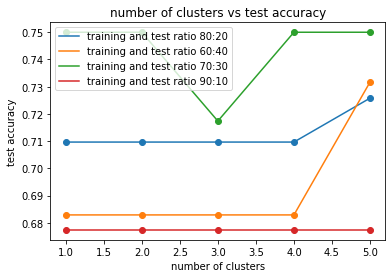

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5],sc1[0],label="training and test ratio 80:20")
plt.plot([1,2,3,4,5],sc1[1],label="training and test ratio 60:40")
plt.plot([1,2,3,4,5],sc1[2],label="training and test ratio 70:30")
plt.plot([1,2,3,4,5],sc1[3],label="training and test ratio 90:10")
plt.scatter([1,2,3,4,5],sc1[0])
plt.scatter([1,2,3,4,5],sc1[1])
plt.scatter([1,2,3,4,5],sc1[2])
plt.scatter([1,2,3,4,5],sc1[3])
plt.title("number of clusters vs test accuracy")
plt.xlabel("number of clusters")
plt.ylabel("test accuracy")
plt.legend()
plt.show()

In [ ]:
sc=[[] for i in range(5)]
for i in [0.8,0.6,0.7,0.9]:
  print("for training and test ratio as ",round(i*100),':',round((1-i)*100))
  x_train, x_test, y_train, y_test = train_test_split(df[:,:-1],df[:,-1], train_size=i, random_state=42)
  for j in [1,2,3,4,5]:
    print("accuracy of k nearest neighbour(l2 norm) for k=",j,'is',accuracyscore(y_test,predictl2(x_train,y_train,x_test,j)))
    sc[j-1].append(accuracyscore(y_test,predictl2(x_train,y_train,x_test,j)))
sc=np.transpose(sc)

for training and test ratio as  80 : 20
accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.7096774193548387
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.7096774193548387
accuracy of k nearest neighbour(l2 norm) for k= 3 is 0.6935483870967742
accuracy of k nearest neighbour(l2 norm) for k= 4 is 0.7096774193548387
accuracy of k nearest neighbour(l2 norm) for k= 5 is 0.7258064516129032
for training and test ratio as  60 : 40
accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.6829268292682927
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.6829268292682927
accuracy of k nearest neighbour(l2 norm) for k= 3 is 0.6829268292682927
accuracy of k nearest neighbour(l2 norm) for k= 4 is 0.6829268292682927
accuracy of k nearest neighbour(l2 norm) for k= 5 is 0.7317073170731707
for training and test ratio as  70 : 30
accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.75
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.75
accuracy of k nearest neighbour(l2 norm) for

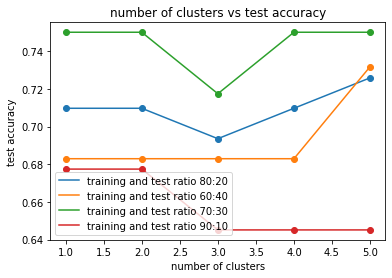

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5],sc[0],label="training and test ratio 80:20")
plt.plot([1,2,3,4,5],sc[1],label="training and test ratio 60:40")
plt.plot([1,2,3,4,5],sc[2],label="training and test ratio 70:30")
plt.plot([1,2,3,4,5],sc[3],label="training and test ratio 90:10")
plt.scatter([1,2,3,4,5],sc[0])
plt.scatter([1,2,3,4,5],sc[1])
plt.scatter([1,2,3,4,5],sc[2])
plt.scatter([1,2,3,4,5],sc[3])
plt.title("number of clusters vs test accuracy")
plt.xlabel("number of clusters")
plt.ylabel("test accuracy")
plt.legend()
plt.show()

In [ ]:
def predictl1sk(x_train,y_train,x_test,k):
  neigh = KNeighborsClassifier(n_neighbors=k,p=1)
  neigh.fit(x_train,y_train)
  return neigh.predict(x_test)  

In [ ]:
def predictl2sk(x_train,y_train,x_test,k):
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(x_train,y_train)
  return neigh.predict(x_test)  

In [ ]:
sc1=[[] for i in range(5)]
for i in [0.8,0.6,0.7,0.9]:
  print("for training and test ratio as ",round(i*100),':',round((1-i)*100))
  x_train, x_test, y_train, y_test = train_test_split(df[:,:-1],df[:,-1], train_size=i, random_state=42)
  for j in [1,2,3,4,5]:
    print("accuracy of k nearest neighbour(l2 norm) for k=",j,'is',accuracyscore(y_test,predictl1sk(x_train,y_train,x_test,j)))
    sc1[j-1].append(accuracyscore(y_test,predictl1(x_train,y_train,x_test,j)))
sc1=np.transpose(sc1)

for training and test ratio as  80 : 20
accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.6935483870967742
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.7096774193548387
accuracy of k nearest neighbour(l2 norm) for k= 3 is 0.7096774193548387
accuracy of k nearest neighbour(l2 norm) for k= 4 is 0.6935483870967742
accuracy of k nearest neighbour(l2 norm) for k= 5 is 0.7096774193548387
for training and test ratio as  60 : 40
accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.7560975609756098
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.7317073170731707
accuracy of k nearest neighbour(l2 norm) for k= 3 is 0.7317073170731707
accuracy of k nearest neighbour(l2 norm) for k= 4 is 0.7317073170731707
accuracy of k nearest neighbour(l2 norm) for k= 5 is 0.7317073170731707
for training and test ratio as  70 : 30
accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.358695652173913
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.7391304347826086
accuracy of k nea

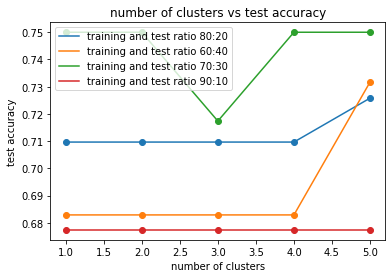

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5],sc1[0],label="training and test ratio 80:20")
plt.plot([1,2,3,4,5],sc1[1],label="training and test ratio 60:40")
plt.plot([1,2,3,4,5],sc1[2],label="training and test ratio 70:30")
plt.plot([1,2,3,4,5],sc1[3],label="training and test ratio 90:10")
plt.scatter([1,2,3,4,5],sc1[0])
plt.scatter([1,2,3,4,5],sc1[1])
plt.scatter([1,2,3,4,5],sc1[2])
plt.scatter([1,2,3,4,5],sc1[3])
plt.title("number of clusters vs test accuracy")
plt.xlabel("number of clusters")
plt.ylabel("test accuracy")
plt.legend()
plt.show()

In [ ]:
sc=[[] for i in range(5)]
for i in [0.8,0.6,0.7,0.9]:
  print("for training and test ratio as ",round(i*100),':',round((1-i)*100))
  x_train, x_test, y_train, y_test = train_test_split(df[:,:-1],df[:,-1], train_size=i, random_state=42)
  for j in [1,2,3,4,5]:
    print("accuracy of k nearest neighbour(l2 norm) for k=",j,'is',accuracyscore(y_test,predictl2sk(x_train,y_train,x_test,j)))
    sc[j-1].append(accuracyscore(y_test,predictl2(x_train,y_train,x_test,j)))
sc=np.transpose(sc)

for training and test ratio as  80 : 20
accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.6935483870967742
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.7096774193548387
accuracy of k nearest neighbour(l2 norm) for k= 3 is 0.6935483870967742
accuracy of k nearest neighbour(l2 norm) for k= 4 is 0.6935483870967742
accuracy of k nearest neighbour(l2 norm) for k= 5 is 0.6935483870967742
for training and test ratio as  60 : 40
accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.7560975609756098
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.7317073170731707
accuracy of k nearest neighbour(l2 norm) for k= 3 is 0.7317073170731707
accuracy of k nearest neighbour(l2 norm) for k= 4 is 0.7317073170731707
accuracy of k nearest neighbour(l2 norm) for k= 5 is 0.7317073170731707
for training and test ratio as  70 : 30
accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.358695652173913
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.7391304347826086
accuracy of k nea

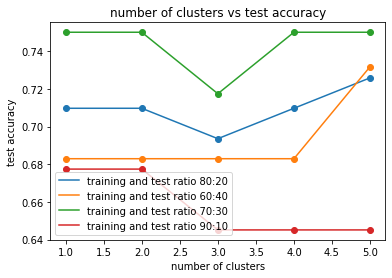

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5],sc[0],label="training and test ratio 80:20")
plt.plot([1,2,3,4,5],sc[1],label="training and test ratio 60:40")
plt.plot([1,2,3,4,5],sc[2],label="training and test ratio 70:30")
plt.plot([1,2,3,4,5],sc[3],label="training and test ratio 90:10")
plt.scatter([1,2,3,4,5],sc[0])
plt.scatter([1,2,3,4,5],sc[1])
plt.scatter([1,2,3,4,5],sc[2])
plt.scatter([1,2,3,4,5],sc[3])
plt.title("number of clusters vs test accuracy")
plt.xlabel("number of clusters")
plt.ylabel("test accuracy")
plt.legend()
plt.show()

In [ ]:
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 2)
  
df1 = pca.fit_transform(df[:,:-1] )
explained_variance = pca.explained_variance_ratio_

In [ ]:
sc1=[[] for i in range(5)]
for i in [0.8,0.6,0.7,0.9]:
  print("for training and test ratio as ",round(i*100),':',round((1-i)*100))
  x_train, x_test, y_train, y_test = train_test_split(df1,df[:,-1], train_size=i, random_state=42)
  for j in [1,2,3,4,5]:
    print("accuracy of k nearest neighbour(l2 norm) for k=",j,'is',accuracyscore(y_test,predictl1(x_train,y_train,x_test,j)))
    sc1[j-1].append(accuracyscore(y_test,predictl1(x_train,y_train,x_test,j)))
sc1=np.transpose(sc1)

for training and test ratio as  80 : 20
accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.7096774193548387
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.7096774193548387
accuracy of k nearest neighbour(l2 norm) for k= 3 is 0.6935483870967742
accuracy of k nearest neighbour(l2 norm) for k= 4 is 0.7096774193548387
accuracy of k nearest neighbour(l2 norm) for k= 5 is 0.7096774193548387
for training and test ratio as  60 : 40
accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.7073170731707317
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.7073170731707317
accuracy of k nearest neighbour(l2 norm) for k= 3 is 0.3252032520325203
accuracy of k nearest neighbour(l2 norm) for k= 4 is 0.3008130081300813
accuracy of k nearest neighbour(l2 norm) for k= 5 is 0.3252032520325203
for training and test ratio as  70 : 30
accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.717391304347826
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.717391304347826
accuracy of k near

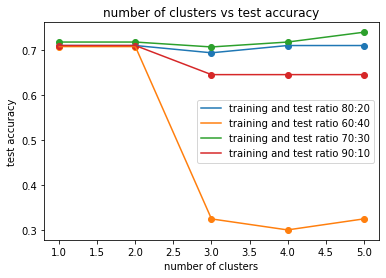

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5],sc1[0],label="training and test ratio 80:20")
plt.plot([1,2,3,4,5],sc1[1],label="training and test ratio 60:40")
plt.plot([1,2,3,4,5],sc1[2],label="training and test ratio 70:30")
plt.plot([1,2,3,4,5],sc1[3],label="training and test ratio 90:10")
plt.scatter([1,2,3,4,5],sc1[0])
plt.scatter([1,2,3,4,5],sc1[1])
plt.scatter([1,2,3,4,5],sc1[2])
plt.scatter([1,2,3,4,5],sc1[3])
plt.title("number of clusters vs test accuracy")
plt.xlabel("number of clusters")
plt.ylabel("test accuracy")
plt.legend()
plt.show()

In [ ]:
sc=[[] for i in range(5)]
for i in [0.8,0.6,0.7,0.9]:
  print("for training and test ratio as ",round(i*100),':',round((1-i)*100))
  x_train, x_test, y_train, y_test = train_test_split(df1,df[:,-1], train_size=i, random_state=42)
  for j in [1,2,3,4,5]:
    print("accuracy of k nearest neighbour(l2 norm) for k=",j,'is',accuracyscore(y_test,predictl2(x_train,y_train,x_test,j)))
    sc[j-1].append(accuracyscore(y_test,predictl2(x_train,y_train,x_test,j)))
sc=np.transpose(sc)

for training and test ratio as  80 : 20
accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.6612903225806451
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.6612903225806451
accuracy of k nearest neighbour(l2 norm) for k= 3 is 0.6774193548387096
accuracy of k nearest neighbour(l2 norm) for k= 4 is 0.7096774193548387
accuracy of k nearest neighbour(l2 norm) for k= 5 is 0.7096774193548387
for training and test ratio as  60 : 40
accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.7073170731707317
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.7073170731707317
accuracy of k nearest neighbour(l2 norm) for k= 3 is 0.3252032520325203
accuracy of k nearest neighbour(l2 norm) for k= 4 is 0.35772357723577236
accuracy of k nearest neighbour(l2 norm) for k= 5 is 0.3252032520325203
for training and test ratio as  70 : 30
accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.7065217391304348
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.7065217391304348
accuracy of k n

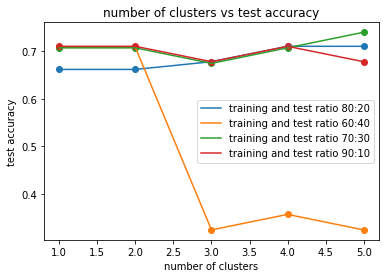

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5],sc[0],label="training and test ratio 80:20")
plt.plot([1,2,3,4,5],sc[1],label="training and test ratio 60:40")
plt.plot([1,2,3,4,5],sc[2],label="training and test ratio 70:30")
plt.plot([1,2,3,4,5],sc[3],label="training and test ratio 90:10")
plt.scatter([1,2,3,4,5],sc[0])
plt.scatter([1,2,3,4,5],sc[1])
plt.scatter([1,2,3,4,5],sc[2])
plt.scatter([1,2,3,4,5],sc[3])
plt.title("number of clusters vs test accuracy")
plt.xlabel("number of clusters")
plt.ylabel("test accuracy")
plt.legend()
plt.show()

In [ ]:
sc1=[[] for i in range(5)]
for i in [0.8,0.6,0.7,0.9]:
  print("for training and test ratio as ",round(i*100),':',round((1-i)*100))
  x_train, x_test, y_train, y_test = train_test_split(df1,df[:,-1], train_size=i, random_state=42)
  for j in [1,2,3,4,5]:
    print("accuracy of k nearest neighbour(l2 norm) for k=",j,'is',accuracyscore(y_test,predictl1sk(x_train,y_train,x_test,j)))
    sc1[j-1].append(accuracyscore(y_test,predictl1(x_train,y_train,x_test,j)))
sc1=np.transpose(sc1)

for training and test ratio as  80 : 20
accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.6935483870967742
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.6935483870967742
accuracy of k nearest neighbour(l2 norm) for k= 3 is 0.6935483870967742
accuracy of k nearest neighbour(l2 norm) for k= 4 is 0.7096774193548387
accuracy of k nearest neighbour(l2 norm) for k= 5 is 0.7096774193548387
for training and test ratio as  60 : 40
accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.36585365853658536
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.7642276422764228
accuracy of k nearest neighbour(l2 norm) for k= 3 is 0.7560975609756098
accuracy of k nearest neighbour(l2 norm) for k= 4 is 0.7235772357723578
accuracy of k nearest neighbour(l2 norm) for k= 5 is 0.7235772357723578
for training and test ratio as  70 : 30
accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.3695652173913043
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.75
accuracy of k nearest neighbo

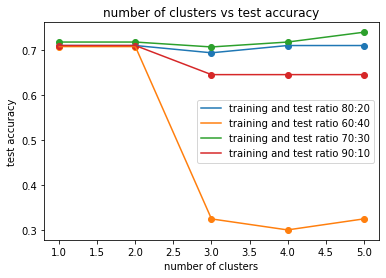

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5],sc1[0],label="training and test ratio 80:20")
plt.plot([1,2,3,4,5],sc1[1],label="training and test ratio 60:40")
plt.plot([1,2,3,4,5],sc1[2],label="training and test ratio 70:30")
plt.plot([1,2,3,4,5],sc1[3],label="training and test ratio 90:10")
plt.scatter([1,2,3,4,5],sc1[0])
plt.scatter([1,2,3,4,5],sc1[1])
plt.scatter([1,2,3,4,5],sc1[2])
plt.scatter([1,2,3,4,5],sc1[3])
plt.title("number of clusters vs test accuracy")
plt.xlabel("number of clusters")
plt.ylabel("test accuracy")
plt.legend()
plt.show()

In [ ]:
sc=[[] for i in range(5)]
for i in [0.8,0.6,0.7,0.9]:
  print("for training and test ratio as ",round(i*100),':',round((1-i)*100))
  x_train, x_test, y_train, y_test = train_test_split(df1,df[:,-1], train_size=i, random_state=42)
  for j in [1,2,3,4,5]:
    print("accuracy of k nearest neighbour(l2 norm) for k=",j,'is',accuracyscore(y_test,predictl2sk(x_train,y_train,x_test,j)))
    sc[j-1].append(accuracyscore(y_test,predictl2(x_train,y_train,x_test,j)))
sc=np.transpose(sc)

for training and test ratio as  80 : 20
accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.6935483870967742
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.6935483870967742
accuracy of k nearest neighbour(l2 norm) for k= 3 is 0.6935483870967742
accuracy of k nearest neighbour(l2 norm) for k= 4 is 0.7096774193548387
accuracy of k nearest neighbour(l2 norm) for k= 5 is 0.7096774193548387
for training and test ratio as  60 : 40
accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.36585365853658536
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.7642276422764228
accuracy of k nearest neighbour(l2 norm) for k= 3 is 0.7560975609756098
accuracy of k nearest neighbour(l2 norm) for k= 4 is 0.7235772357723578
accuracy of k nearest neighbour(l2 norm) for k= 5 is 0.7235772357723578
for training and test ratio as  70 : 30
accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.3695652173913043
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.75
accuracy of k nearest neighbo

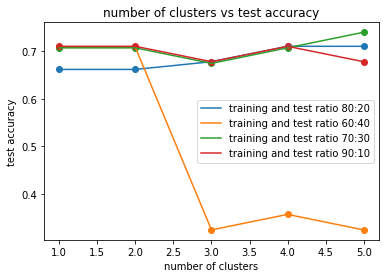

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5],sc[0],label="training and test ratio 80:20")
plt.plot([1,2,3,4,5],sc[1],label="training and test ratio 60:40")
plt.plot([1,2,3,4,5],sc[2],label="training and test ratio 70:30")
plt.plot([1,2,3,4,5],sc[3],label="training and test ratio 90:10")
plt.scatter([1,2,3,4,5],sc[0])
plt.scatter([1,2,3,4,5],sc[1])
plt.scatter([1,2,3,4,5],sc[2])
plt.scatter([1,2,3,4,5],sc[3])
plt.title("number of clusters vs test accuracy")
plt.xlabel("number of clusters")
plt.ylabel("test accuracy")
plt.legend()
plt.show()

In [ ]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [ ]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
california_housing.frame.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

In [ ]:
x=california_housing.frame.to_numpy()

## PCA for k=2

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x=scaler.transform(x)

In [ ]:
from sklearn.decomposition import PCA
  
pca = PCA(n_components =2)
  
x= pca.fit_transform(x) 
explained_variance = pca.explained_variance_ratio_

In [ ]:
class KMeansl2:
    def __init__(self,k):
        self.k = k

    def train(self,X,MAXITER = 10**4, TOL = 1e-3):
        centroids = np.random.rand(self.k,X.shape[1])
        centroidsold = centroids.copy()
        for iter_ in range(MAXITER):
            dist = np.linalg.norm(X - centroids[0,:],axis=1).reshape(-1,1)
            for class_ in range(1,self.k):
                dist = np.append(dist,np.linalg.norm(X - centroids[class_,:],axis=1).reshape(-1,1),axis=1)
            classes = np.argmin(dist,axis=1)
            # update position
            for class_ in set(classes):
                centroids[class_,:] = np.mean(X[classes == class_,:],axis=0)
            if np.linalg.norm(centroids - centroidsold) < TOL:
                break
                print('Centroid converged')
        self.centroids = centroids
    
    def predict(self,X):
        dist = np.linalg.norm(X - self.centroids[0,:],axis=1).reshape(-1,1)
        for class_ in range(1,self.k):
            dist = np.append(dist,np.linalg.norm(X - self.centroids[class_,:],axis=1).reshape(-1,1),axis=1)
        classes = np.argmin(dist,axis=1)
        return classes

In [ ]:
class KMeansl1:
    def __init__(self,k):
        self.k = k

    def train(self,X,MAXITER = 10**4, TOL = 1e-3):
        centroids = np.random.rand(self.k,X.shape[1])
        centroidsold = centroids.copy()
        for iter_ in range(MAXITER):
            dist = np.linalg.norm(X - centroids[0,:],axis=1,ord=1).reshape(-1,1)
            for class_ in range(1,self.k):
                dist = np.append(dist,np.linalg.norm(X - centroids[class_,:],axis=1,ord=1).reshape(-1,1),axis=1)
            classes = np.argmin(dist,axis=1)
            # update position
            for class_ in set(classes):
                centroids[class_,:] = np.mean(X[classes == class_,:],axis=0)
            if np.linalg.norm(centroids - centroidsold,ord=1) < TOL:
                break
                print('Centroid converged')
        self.centroids = centroids
    
    def predict(self,X):
        dist = np.linalg.norm(X - self.centroids[0,:],axis=1,ord=1).reshape(-1,1)
        for class_ in range(1,self.k):
            dist = np.append(dist,np.linalg.norm(X - self.centroids[class_,:],axis=1,ord=1).reshape(-1,1),axis=1)
        classes = np.argmin(dist,axis=1)
        return classes

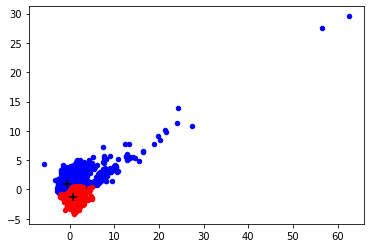

In [ ]:
kmeans = KMeansl1(2)
kmeans.train(x)
classes = kmeans.predict(x)
plt.scatter(x[classes == 0, 0], x[classes == 0, 1], s = 20, c = 'b')
plt.scatter(x[classes == 1, 0], x[classes == 1, 1], s = 20, c = 'r')
plt.scatter(kmeans.centroids[:,0],kmeans.centroids[:,1],s = 50, c = 'k',marker = '+')
plt.show()

In [ ]:
df2=pd.DataFrame(x)
df2['label']=classes
df2

0         1  label
0      2.346543  0.346441      1
1      1.761367  0.438124      1
2      2.330312 -0.126208      1
3      1.537078 -0.810004      1
4      1.416914 -1.121116      1
...         ...       ...    ...
20635  0.602464 -2.251757      1
20636  1.264302 -1.815928      1
20637  0.687380 -2.056770      1
20638  0.828435 -2.073240      1
20639  0.771440 -1.832743      1

[20640 rows x 3 columns]

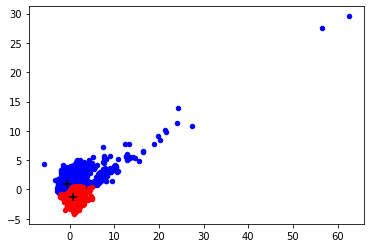

In [ ]:
kmeans = KMeansl1(2)
kmeans.train(x)
classes = kmeans.predict(x)
plt.scatter(x[classes == 0, 0], x[classes == 0, 1], s = 20, c = 'b')
plt.scatter(x[classes == 1, 0], x[classes == 1, 1], s = 20, c = 'r')
plt.scatter(kmeans.centroids[:,0],kmeans.centroids[:,1],s = 50, c = 'k',marker = '+')
plt.show()

In [ ]:
print(x[classes == 0])
print(x[classes==1])

[[3.0699719  1.40990451]
 [2.79004074 0.55616239]
 [2.57557971 0.46232335]
 ...
 [0.44359722 2.23263574]
 [0.14951832 1.37377989]
 [0.26945539 1.9592097 ]]
[[ 2.34654276  0.34644059]
 [ 1.76136708  0.43812372]
 [ 2.33031157 -0.12620806]
 ...
 [ 0.68738046 -2.0567699 ]
 [ 0.82843475 -2.07324029]
 [ 0.77143988 -1.83274305]]


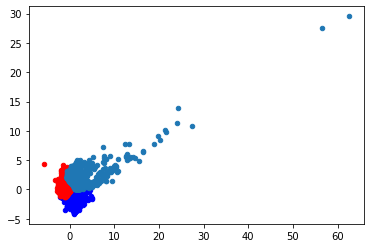

In [ ]:
kmeans = KMeansl1(3)
kmeans.train(x)
classes = kmeans.predict(x)
plt.scatter(x[classes == 0, 0], x[classes == 0, 1], s = 20, c = 'b')
plt.scatter(x[classes == 1, 0], x[classes == 1, 1], s = 20, c = 'r')
plt.scatter(x[classes == 2, 0], x[classes == 2, 1], s = 20)
plt.show()

In [ ]:
df2=pd.DataFrame(x)
df2['label']=classes
df2

0         1  label
0      2.346543  0.346441      2
1      1.761367  0.438124      2
2      2.330312 -0.126208      0
3      1.537078 -0.810004      0
4      1.416914 -1.121116      0
...         ...       ...    ...
20635  0.602464 -2.251757      0
20636  1.264302 -1.815928      0
20637  0.687380 -2.056770      0
20638  0.828435 -2.073240      0
20639  0.771440 -1.832743      0

[20640 rows x 3 columns]

In [ ]:
print(x[classes == 0])
print(x[classes==1])
print(x[classes==2])

[[ 2.33031157 -0.12620806]
 [ 1.53707836 -0.81000446]
 [ 1.4169141  -1.12111585]
 ...
 [ 0.68738046 -2.0567699 ]
 [ 0.82843475 -2.07324029]
 [ 0.77143988 -1.83274305]]
[[ 0.4549865   0.47045511]
 [ 0.42613101  0.36892276]
 [ 0.48101949  0.46980107]
 ...
 [ 0.01175679  1.13360175]
 [ 0.16150227  1.16135817]
 [-0.6255614   0.15345127]]
[[2.34654276 0.34644059]
 [1.76136708 0.43812372]
 [2.15607637 0.31137575]
 ...
 [0.44359722 2.23263574]
 [0.14951832 1.37377989]
 [0.26945539 1.9592097 ]]


[3 3 3 ... 2 2 2]
[[-0.93112336  0.60163731]
 [ 1.34408419  2.48946938]
 [ 0.54252569 -1.73364647]
 [ 1.23787559 -0.45629039]]


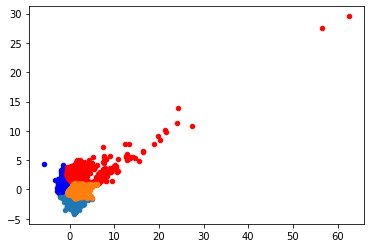

In [ ]:
kmeans = KMeansl1(4)
kmeans.train(x)
classes = kmeans.predict(x)
print(classes)
print(kmeans.centroids)
plt.scatter(x[classes == 0, 0], x[classes == 0, 1], s = 20, c = 'b')
plt.scatter(x[classes == 1, 0], x[classes == 1, 1], s = 20, c = 'r')
plt.scatter(x[classes == 2, 0], x[classes == 2, 1], s = 20)
plt.scatter(x[classes == 3, 0], x[classes == 3, 1], s = 20)
plt.show()

In [ ]:
df2=pd.DataFrame(x)
df2['label']=classes
df2

0         1  label
0      2.346543  0.346441      3
1      1.761367  0.438124      3
2      2.330312 -0.126208      3
3      1.537078 -0.810004      3
4      1.416914 -1.121116      3
...         ...       ...    ...
20635  0.602464 -2.251757      2
20636  1.264302 -1.815928      2
20637  0.687380 -2.056770      2
20638  0.828435 -2.073240      2
20639  0.771440 -1.832743      2

[20640 rows x 3 columns]

In [ ]:
print(x[classes == 0])
print(x[classes==1])
print(x[classes==2])
print(x[classes==3])

[[ 0.4549865   0.47045511]
 [ 0.42613101  0.36892276]
 [ 0.48101949  0.46980107]
 ...
 [ 0.16150227  1.16135817]
 [-0.6255614   0.15345127]
 [ 0.14951832  1.37377989]]
[[3.0699719  1.40990451]
 [2.98353898 1.43080449]
 [3.40629406 1.89234401]
 ...
 [0.85200834 1.92273978]
 [0.44359722 2.23263574]
 [0.26945539 1.9592097 ]]
[[ 1.02371812 -1.5030926 ]
 [ 0.81925324 -1.46316665]
 [ 0.72817309 -1.7154812 ]
 ...
 [ 0.68738046 -2.0567699 ]
 [ 0.82843475 -2.07324029]
 [ 0.77143988 -1.83274305]]
[[ 2.34654276  0.34644059]
 [ 1.76136708  0.43812372]
 [ 2.33031157 -0.12620806]
 ...
 [ 1.19241262 -1.00711125]
 [ 1.69695508 -0.77698331]
 [ 1.25146184 -1.33955388]]


[1 1 1 ... 4 4 4]
[[ 0.4445082   2.09314819]
 [ 1.34300753 -0.36920519]
 [15.7264854   7.15032853]
 [-1.01070662  0.47291602]
 [ 0.55705953 -1.69210886]]


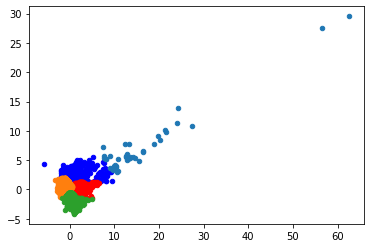

In [ ]:
kmeans = KMeansl1(5)
kmeans.train(x)
classes = kmeans.predict(x)
print(classes)
print(kmeans.centroids)
plt.scatter(x[classes == 0, 0], x[classes == 0, 1], s = 20, c = 'b')
plt.scatter(x[classes == 1, 0], x[classes == 1, 1], s = 20, c = 'r')
plt.scatter(x[classes == 2, 0], x[classes == 2, 1], s = 20)
plt.scatter(x[classes == 3, 0], x[classes == 3, 1], s = 20)
plt.scatter(x[classes == 4, 0], x[classes == 4, 1], s = 20)
plt.show()

In [ ]:
df2=pd.DataFrame(x)
df2['label']=classes
df2

0         1  label
0      2.346543  0.346441      1
1      1.761367  0.438124      1
2      2.330312 -0.126208      1
3      1.537078 -0.810004      1
4      1.416914 -1.121116      1
...         ...       ...    ...
20635  0.602464 -2.251757      4
20636  1.264302 -1.815928      4
20637  0.687380 -2.056770      4
20638  0.828435 -2.073240      4
20639  0.771440 -1.832743      4

[20640 rows x 3 columns]

In [ ]:
print(x[classes == 0])
print(x[classes==1])
print(x[classes==2])
print(x[classes==3])
print(x[classes==4])

[[3.0699719  1.40990451]
 [2.98353898 1.43080449]
 [3.40629406 1.89234401]
 ...
 [0.44359722 2.23263574]
 [0.14951832 1.37377989]
 [0.26945539 1.9592097 ]]
[[ 2.34654276  0.34644059]
 [ 1.76136708  0.43812372]
 [ 2.33031157 -0.12620806]
 ...
 [ 1.12735698 -0.68712569]
 [ 1.19241262 -1.00711125]
 [ 1.69695508 -0.77698331]]
[[10.38572208  3.84162782]
 [15.59246761  4.82825147]
 [10.32129759  4.03051867]
 [10.25388264  3.75520678]
 [12.76453222  4.94498499]
 [20.14590164  8.49633362]
 [ 9.77951694  3.38490016]
 [16.39866744  6.51166529]
 [21.65427422  9.7367134 ]
 [23.96357472 11.32199523]
 [56.39837798 27.49757863]
 [14.66787745  5.30187356]
 [14.2824208   5.55013784]
 [62.43488943 29.55318601]
 [ 9.87624724  3.91587236]
 [19.70207504  9.1895156 ]
 [ 9.11328368  3.65839628]
 [10.84921821  5.16114917]
 [12.63989149  5.73418621]
 [21.40011591 10.20539704]
 [12.90458221  6.08127124]
 [13.19288742  5.16465079]
 [ 9.60950322  3.52273176]
 [18.98773586  7.71869332]
 [ 9.83600757  3.58760928]
 

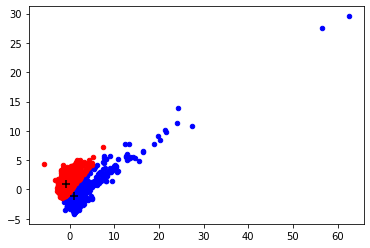

In [ ]:
kmeans = KMeansl2(2)
kmeans.train(x)
classes = kmeans.predict(x)
plt.scatter(x[classes == 0, 0], x[classes == 0, 1], s = 20, c = 'b')
plt.scatter(x[classes == 1, 0], x[classes == 1, 1], s = 20, c = 'r')
plt.scatter(kmeans.centroids[:,0],kmeans.centroids[:,1],s = 50, c = 'k',marker = '+')
plt.show()

In [ ]:
df2=pd.DataFrame(x)
df2['label']=classes
df2

0         1  label
0      2.346543  0.346441      0
1      1.761367  0.438124      0
2      2.330312 -0.126208      0
3      1.537078 -0.810004      0
4      1.416914 -1.121116      0
...         ...       ...    ...
20635  0.602464 -2.251757      0
20636  1.264302 -1.815928      0
20637  0.687380 -2.056770      0
20638  0.828435 -2.073240      0
20639  0.771440 -1.832743      0

[20640 rows x 3 columns]

In [ ]:
print(x[classes == 0])
print(x[classes==1])

[[ 2.34654276  0.34644059]
 [ 1.76136708  0.43812372]
 [ 2.33031157 -0.12620806]
 ...
 [ 0.68738046 -2.0567699 ]
 [ 0.82843475 -2.07324029]
 [ 0.77143988 -1.83274305]]
[[1.26490818 1.1658516 ]
 [0.4549865  0.47045511]
 [0.42613101 0.36892276]
 ...
 [0.44359722 2.23263574]
 [0.14951832 1.37377989]
 [0.26945539 1.9592097 ]]


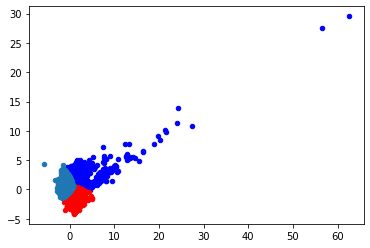

In [ ]:
kmeans = KMeansl2(3)
kmeans.train(x)
classes = kmeans.predict(x)
plt.scatter(x[classes == 0, 0], x[classes == 0, 1], s = 20, c = 'b')
plt.scatter(x[classes == 1, 0], x[classes == 1, 1], s = 20, c = 'r')
plt.scatter(x[classes == 2, 0], x[classes == 2, 1], s = 20)
plt.show()

In [ ]:
df2=pd.DataFrame(x)
df2['label']=classes
df2

0         1  label
0      2.346543  0.346441      0
1      1.761367  0.438124      0
2      2.330312 -0.126208      1
3      1.537078 -0.810004      1
4      1.416914 -1.121116      1
...         ...       ...    ...
20635  0.602464 -2.251757      1
20636  1.264302 -1.815928      1
20637  0.687380 -2.056770      1
20638  0.828435 -2.073240      1
20639  0.771440 -1.832743      1

[20640 rows x 3 columns]

In [ ]:
print(x[classes == 0])
print(x[classes==1])
print(x[classes==2])

[[2.34654276 0.34644059]
 [1.76136708 0.43812372]
 [2.15607637 0.31137575]
 ...
 [0.85200834 1.92273978]
 [0.44359722 2.23263574]
 [0.26945539 1.9592097 ]]
[[ 2.33031157 -0.12620806]
 [ 1.53707836 -0.81000446]
 [ 1.4169141  -1.12111585]
 ...
 [ 0.68738046 -2.0567699 ]
 [ 0.82843475 -2.07324029]
 [ 0.77143988 -1.83274305]]
[[ 0.4549865   0.47045511]
 [ 0.42613101  0.36892276]
 [ 0.48101949  0.46980107]
 ...
 [ 0.16150227  1.16135817]
 [-0.6255614   0.15345127]
 [ 0.14951832  1.37377989]]


[2 1 2 ... 2 2 2]
[[-1.00048183  0.49733898]
 [ 0.68456886  1.92380541]
 [ 0.7811459  -1.2998099 ]
 [13.39085926  5.78486736]]


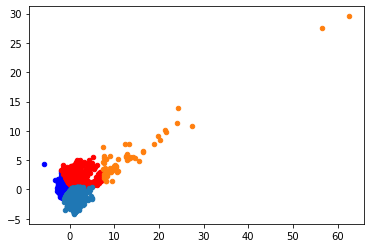

In [ ]:
kmeans = KMeansl2(4)
kmeans.train(x)
classes = kmeans.predict(x)
print(classes)
print(kmeans.centroids)
plt.scatter(x[classes == 0, 0], x[classes == 0, 1], s = 20, c = 'b')
plt.scatter(x[classes == 1, 0], x[classes == 1, 1], s = 20, c = 'r')
plt.scatter(x[classes == 2, 0], x[classes == 2, 1], s = 20)
plt.scatter(x[classes == 3, 0], x[classes == 3, 1], s = 20)
plt.show()

In [ ]:
df2=pd.DataFrame(x)
df2['label']=classes
df2

0         1  label
0      2.346543  0.346441      2
1      1.761367  0.438124      1
2      2.330312 -0.126208      2
3      1.537078 -0.810004      2
4      1.416914 -1.121116      2
...         ...       ...    ...
20635  0.602464 -2.251757      2
20636  1.264302 -1.815928      2
20637  0.687380 -2.056770      2
20638  0.828435 -2.073240      2
20639  0.771440 -1.832743      2

[20640 rows x 3 columns]

In [ ]:
print(x[classes == 0])
print(x[classes==1])
print(x[classes==2])
print(x[classes==3])

[[ 0.4549865   0.47045511]
 [ 0.42613101  0.36892276]
 [ 0.3288967   0.39540789]
 ...
 [-0.23624721  0.97780256]
 [-0.19352     0.9372352 ]
 [-0.6255614   0.15345127]]
[[1.76136708 0.43812372]
 [3.0699719  1.40990451]
 [2.35311353 0.38722034]
 ...
 [0.44359722 2.23263574]
 [0.14951832 1.37377989]
 [0.26945539 1.9592097 ]]
[[ 2.34654276  0.34644059]
 [ 2.33031157 -0.12620806]
 [ 1.53707836 -0.81000446]
 ...
 [ 0.68738046 -2.0567699 ]
 [ 0.82843475 -2.07324029]
 [ 0.77143988 -1.83274305]]
[[10.38572208  3.84162782]
 [15.59246761  4.82825147]
 [10.32129759  4.03051867]
 [10.25388264  3.75520678]
 [12.76453222  4.94498499]
 [20.14590164  8.49633362]
 [ 7.7694453   4.51613129]
 [ 9.77951694  3.38490016]
 [16.39866744  6.51166529]
 [21.65427422  9.7367134 ]
 [23.96357472 11.32199523]
 [56.39837798 27.49757863]
 [14.66787745  5.30187356]
 [14.2824208   5.55013784]
 [62.43488943 29.55318601]
 [ 9.87624724  3.91587236]
 [19.70207504  9.1895156 ]
 [ 9.11328368  3.65839628]
 [10.84921821  5.16114

[2 2 2 ... 0 0 0]
[[ 0.6514827  -1.47187485]
 [-1.04378041  0.40175585]
 [ 2.10910715  0.31335775]
 [20.44226352  9.2030798 ]
 [ 0.04973428  1.91880092]]


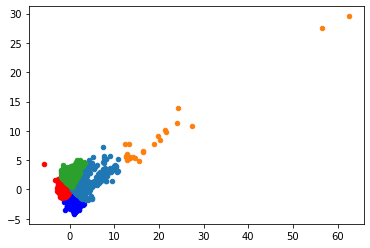

In [ ]:
kmeans = KMeansl2(5)
kmeans.train(x)
classes = kmeans.predict(x)
print(classes)
print(kmeans.centroids)
plt.scatter(x[classes == 0, 0], x[classes == 0, 1], s = 20, c = 'b')
plt.scatter(x[classes == 1, 0], x[classes == 1, 1], s = 20, c = 'r')
plt.scatter(x[classes == 2, 0], x[classes == 2, 1], s = 20)
plt.scatter(x[classes == 3, 0], x[classes == 3, 1], s = 20)
plt.scatter(x[classes == 4, 0], x[classes == 4, 1], s = 20)
plt.show()

In [ ]:
df2=pd.DataFrame(x)
df2['label']=classes
df2

0         1  label
0      2.346543  0.346441      2
1      1.761367  0.438124      2
2      2.330312 -0.126208      2
3      1.537078 -0.810004      0
4      1.416914 -1.121116      0
...         ...       ...    ...
20635  0.602464 -2.251757      0
20636  1.264302 -1.815928      0
20637  0.687380 -2.056770      0
20638  0.828435 -2.073240      0
20639  0.771440 -1.832743      0

[20640 rows x 3 columns]

In [ ]:
print(x[classes == 0])
print(x[classes==1])
print(x[classes==2])
print(x[classes==3])
print(x[classes==4])

[[ 1.53707836 -0.81000446]
 [ 1.4169141  -1.12111585]
 [ 1.02371812 -1.5030926 ]
 ...
 [ 0.68738046 -2.0567699 ]
 [ 0.82843475 -2.07324029]
 [ 0.77143988 -1.83274305]]
[[ 0.4549865   0.47045511]
 [ 0.42613101  0.36892276]
 [ 0.3288967   0.39540789]
 ...
 [-0.5124916   0.60828746]
 [-0.19352     0.9372352 ]
 [-0.6255614   0.15345127]]
[[ 2.34654276  0.34644059]
 [ 1.76136708  0.43812372]
 [ 2.33031157 -0.12620806]
 ...
 [ 1.88384322 -0.32555172]
 [ 1.31480938 -0.36474266]
 [ 1.69695508 -0.77698331]]
[[15.59246761  4.82825147]
 [12.76453222  4.94498499]
 [20.14590164  8.49633362]
 [16.39866744  6.51166529]
 [21.65427422  9.7367134 ]
 [23.96357472 11.32199523]
 [56.39837798 27.49757863]
 [14.66787745  5.30187356]
 [14.2824208   5.55013784]
 [62.43488943 29.55318601]
 [19.70207504  9.1895156 ]
 [12.63989149  5.73418621]
 [21.40011591 10.20539704]
 [12.90458221  6.08127124]
 [13.19288742  5.16465079]
 [18.98773586  7.71869332]
 [12.54984151  5.57490164]
 [16.39266728  6.46960542]
 [13.63251

## PCA for dimension 3

In [ ]:
x=california_housing.frame.to_numpy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x=scaler.transform(x)

In [ ]:
from sklearn.decomposition import PCA
  
pca = PCA(n_components =3)
  
x= pca.fit_transform(x) 
explained_variance = pca.explained_variance_ratio_

In [ ]:
kmeans = KMeansl1(2)
kmeans.train(x)
classes = kmeans.predict(x)

In [ ]:
df2=pd.DataFrame(x)
df2['label']=classes
df2

0         1         2  label
0      2.346543  0.346441 -3.028503      1
1      1.761367  0.438124 -2.151692      1
2      2.330312 -0.126208 -2.236715      1
3      1.537078 -0.810004 -2.019956      1
4      1.416914 -1.121116 -1.493024      1
...         ...       ...       ...    ...
20635  0.602464 -2.251757  0.910737      1
20636  1.264302 -1.815928  1.016440      1
20637  0.687380 -2.056770  0.948383      1
20638  0.828435 -2.073240  0.954093      1
20639  0.771440 -1.832743  0.880292      1

[20640 rows x 4 columns]

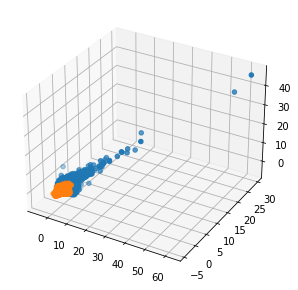

In [ ]:
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[classes == 0,0],x[classes == 0,1],x[classes == 0,2])
ax.scatter(x[classes == 1,0],x[classes == 1,1],x[classes == 1,2])

In [ ]:
print(x[classes == 0])
print(x[classes==1])

[[ 3.0699719   1.40990451 -2.96024177]
 [ 2.44094031  0.71589357 -3.65837898]
 [ 2.98353898  1.43080449 -4.05291753]
 ...
 [ 0.14951832  1.37377989 -0.38272128]
 [ 0.26945539  1.9592097  -0.44071288]
 [-0.02617414 -0.59129711  0.59702754]]
[[ 2.34654276  0.34644059 -3.02850342]
 [ 1.76136708  0.43812372 -2.15169173]
 [ 2.33031157 -0.12620806 -2.23671518]
 ...
 [ 0.68738046 -2.0567699   0.94838264]
 [ 0.82843475 -2.07324029  0.95409328]
 [ 0.77143988 -1.83274305  0.88029193]]


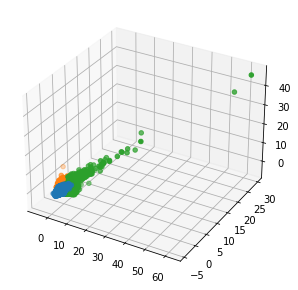

In [ ]:
kmeans = KMeansl1(3)
kmeans.train(x)
classes = kmeans.predict(x)
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[classes == 0,0],x[classes == 0,1],x[classes == 0,2])
ax.scatter(x[classes == 1,0],x[classes == 1,1],x[classes == 1,2])
ax.scatter(x[classes == 2,0],x[classes == 2,1],x[classes == 2,2])

In [ ]:
df2=pd.DataFrame(x)
df2['label']=classes
df2

0         1         2  label
0      2.346543  0.346441 -3.028503      2
1      1.761367  0.438124 -2.151692      2
2      2.330312 -0.126208 -2.236715      2
3      1.537078 -0.810004 -2.019956      2
4      1.416914 -1.121116 -1.493024      0
...         ...       ...       ...    ...
20635  0.602464 -2.251757  0.910737      0
20636  1.264302 -1.815928  1.016440      0
20637  0.687380 -2.056770  0.948383      0
20638  0.828435 -2.073240  0.954093      0
20639  0.771440 -1.832743  0.880292      0

[20640 rows x 4 columns]

In [ ]:
print(x[classes == 0])
print(x[classes==1])
print(x[classes==2])

[[ 1.4169141  -1.12111585 -1.49302378]
 [ 1.02371812 -1.5030926  -1.33771751]
 [ 0.81925324 -1.46316665 -1.45864205]
 ...
 [ 0.68738046 -2.0567699   0.94838264]
 [ 0.82843475 -2.07324029  0.95409328]
 [ 0.77143988 -1.83274305  0.88029193]]
[[ 0.42613101  0.36892276 -0.34492981]
 [ 0.3288967   0.39540789 -0.02704442]
 [ 3.80246353  0.4796486   3.03063035]
 ...
 [-0.19352     0.9372352  -0.00508112]
 [-0.6255614   0.15345127 -0.87039011]
 [-0.02617414 -0.59129711  0.59702754]]
[[ 2.34654276  0.34644059 -3.02850342]
 [ 1.76136708  0.43812372 -2.15169173]
 [ 2.33031157 -0.12620806 -2.23671518]
 ...
 [ 0.14951832  1.37377989 -0.38272128]
 [ 0.26945539  1.9592097  -0.44071288]
 [ 1.88384322 -0.32555172 -1.03195505]]


[2 2 2 ... 1 1 1]
[[-1.04443517  0.366976    0.61588201]
 [ 0.71129801 -1.49826989  0.00905634]
 [ 1.67322932  0.52955089 -2.01627717]
 [ 0.25199013  1.70087049 -0.39655634]]


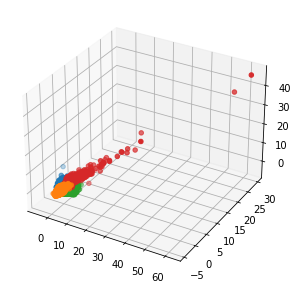

In [ ]:
kmeans = KMeansl1(4)
kmeans.train(x)
classes = kmeans.predict(x)
print(classes)
print(kmeans.centroids)
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[classes == 0,0],x[classes == 0,1],x[classes == 0,2])
ax.scatter(x[classes == 1,0],x[classes == 1,1],x[classes == 1,2])
ax.scatter(x[classes == 2,0],x[classes == 2,1],x[classes == 2,2])
ax.scatter(x[classes == 3,0],x[classes == 3,1],x[classes == 3,2])

In [ ]:
df2=pd.DataFrame(x)
df2['label']=classes
df2

0         1         2  label
0      2.346543  0.346441 -3.028503      2
1      1.761367  0.438124 -2.151692      2
2      2.330312 -0.126208 -2.236715      2
3      1.537078 -0.810004 -2.019956      2
4      1.416914 -1.121116 -1.493024      2
...         ...       ...       ...    ...
20635  0.602464 -2.251757  0.910737      1
20636  1.264302 -1.815928  1.016440      1
20637  0.687380 -2.056770  0.948383      1
20638  0.828435 -2.073240  0.954093      1
20639  0.771440 -1.832743  0.880292      1

[20640 rows x 4 columns]

In [ ]:
print(x[classes == 0])
print(x[classes==1])
print(x[classes==2])
print(x[classes==3])

[[ 2.93861203  0.06251741  2.47016956]
 [ 0.80758972  0.46164549  0.31170954]
 [ 3.10037704  0.2509289   1.97080343]
 ...
 [-0.5124916   0.60828746  0.54152928]
 [-0.6255614   0.15345127 -0.87039011]
 [-0.02617414 -0.59129711  0.59702754]]
[[ 1.02371812 -1.5030926  -1.33771751]
 [ 0.81925324 -1.46316665 -1.45864205]
 [ 0.72817309 -1.7154812  -0.92839959]
 ...
 [ 0.68738046 -2.0567699   0.94838264]
 [ 0.82843475 -2.07324029  0.95409328]
 [ 0.77143988 -1.83274305  0.88029193]]
[[ 2.34654276  0.34644059 -3.02850342]
 [ 1.76136708  0.43812372 -2.15169173]
 [ 2.33031157 -0.12620806 -2.23671518]
 ...
 [-0.08953581  0.79197166 -1.82376885]
 [ 1.88384322 -0.32555172 -1.03195505]
 [ 1.69695508 -0.77698331 -0.84439948]]
[[ 0.4549865   0.47045511 -0.43666885]
 [ 0.42613101  0.36892276 -0.34492981]
 [ 0.79107306  0.40234878 -0.5660478 ]
 ...
 [ 0.44359722  2.23263574 -0.95532694]
 [ 0.14951832  1.37377989 -0.38272128]
 [ 0.26945539  1.9592097  -0.44071288]]


[1 1 1 ... 2 2 2]
[[11.53432187  5.11496867  8.57252343]
 [ 1.62000159  0.74232679 -2.06540586]
 [ 0.72568539 -1.48770221 -0.01670333]
 [-1.07502952  0.31042273  0.68931632]
 [-0.16885926  1.44695211 -0.46308552]]


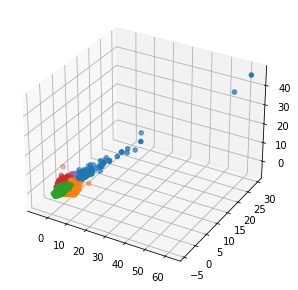

In [ ]:
kmeans = KMeansl1(5)
kmeans.train(x)
classes = kmeans.predict(x)
print(classes)
print(kmeans.centroids)
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[classes == 0,0],x[classes == 0,1],x[classes == 0,2])
ax.scatter(x[classes == 1,0],x[classes == 1,1],x[classes == 1,2])
ax.scatter(x[classes == 2,0],x[classes == 2,1],x[classes == 2,2])
ax.scatter(x[classes == 3,0],x[classes == 3,1],x[classes == 3,2])
ax.scatter(x[classes == 4,0],x[classes == 4,1],x[classes == 4,2])

In [ ]:
df2=pd.DataFrame(x)
df2['label']=classes
df2

0         1         2  label
0      2.346543  0.346441 -3.028503      1
1      1.761367  0.438124 -2.151692      1
2      2.330312 -0.126208 -2.236715      1
3      1.537078 -0.810004 -2.019956      1
4      1.416914 -1.121116 -1.493024      2
...         ...       ...       ...    ...
20635  0.602464 -2.251757  0.910737      2
20636  1.264302 -1.815928  1.016440      2
20637  0.687380 -2.056770  0.948383      2
20638  0.828435 -2.073240  0.954093      2
20639  0.771440 -1.832743  0.880292      2

[20640 rows x 4 columns]

In [ ]:
print(x[classes == 0])
print(x[classes==1])
print(x[classes==2])
print(x[classes==3])
print(x[classes==4])

[[10.38572208  3.84162782  7.32139039]
 [15.59246761  4.82825147 12.19601703]
 [10.32129759  4.03051867  6.80306408]
 [10.25388264  3.75520678  7.63611657]
 [12.76453222  4.94498499  9.48559415]
 [20.14590164  8.49633362 15.46992242]
 [ 9.77951694  3.38490016  7.32267573]
 [16.39866744  6.51166529 11.91322858]
 [ 7.01394722  2.61792731  3.60245925]
 [21.65427422  9.7367134  14.14273154]
 [23.96357472 11.32199523 14.64229711]
 [56.39837798 27.49757863 37.93509313]
 [14.66787745  5.30187356 11.81835064]
 [14.2824208   5.55013784 10.51980802]
 [62.43488943 29.55318601 46.31802018]
 [ 9.87624724  3.91587236  7.36475189]
 [19.70207504  9.1895156  14.42435044]
 [ 9.11328368  3.65839628  6.81336762]
 [10.84921821  5.16114917  7.45468536]
 [ 6.34626179  2.65175665  5.29808244]
 [ 7.04066965  3.05475415  4.20227019]
 [12.63989149  5.73418621 11.40923274]
 [ 9.53421477  1.36181125  7.74261012]
 [ 8.24037463  1.45160136  6.38707793]
 [ 7.66242025  2.65026561  5.80650549]
 [21.40011591 10.20539704

In [ ]:
kmeans = KMeansl2(2)
kmeans.train(x)
classes = kmeans.predict(x)

In [ ]:
df2=pd.DataFrame(x)
df2['label']=classes
df2

0         1         2  label
0      2.346543  0.346441 -3.028503      1
1      1.761367  0.438124 -2.151692      1
2      2.330312 -0.126208 -2.236715      1
3      1.537078 -0.810004 -2.019956      1
4      1.416914 -1.121116 -1.493024      1
...         ...       ...       ...    ...
20635  0.602464 -2.251757  0.910737      1
20636  1.264302 -1.815928  1.016440      1
20637  0.687380 -2.056770  0.948383      1
20638  0.828435 -2.073240  0.954093      1
20639  0.771440 -1.832743  0.880292      1

[20640 rows x 4 columns]

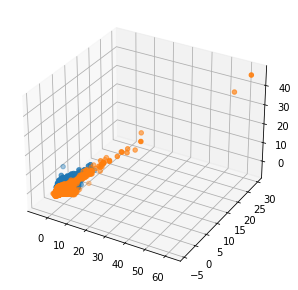

In [ ]:
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[classes == 0,0],x[classes == 0,1],x[classes == 0,2])
ax.scatter(x[classes == 1,0],x[classes == 1,1],x[classes == 1,2])

In [ ]:
print(x[classes == 0])
print(x[classes==1])

[[ 1.26490818  1.1658516  -1.04809243]
 [ 0.4549865   0.47045511 -0.43666885]
 [ 0.42613101  0.36892276 -0.34492981]
 ...
 [ 0.44359722  2.23263574 -0.95532694]
 [ 0.14951832  1.37377989 -0.38272128]
 [ 0.26945539  1.9592097  -0.44071288]]
[[ 2.34654276  0.34644059 -3.02850342]
 [ 1.76136708  0.43812372 -2.15169173]
 [ 2.33031157 -0.12620806 -2.23671518]
 ...
 [ 0.68738046 -2.0567699   0.94838264]
 [ 0.82843475 -2.07324029  0.95409328]
 [ 0.77143988 -1.83274305  0.88029193]]


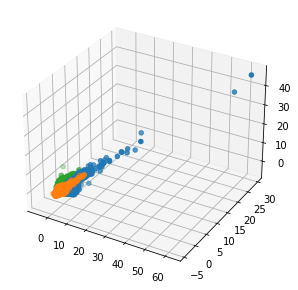

In [ ]:
kmeans = KMeansl2(3)
kmeans.train(x)
classes = kmeans.predict(x)
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[classes == 0,0],x[classes == 0,1],x[classes == 0,2])
ax.scatter(x[classes == 1,0],x[classes == 1,1],x[classes == 1,2])
ax.scatter(x[classes == 2,0],x[classes == 2,1],x[classes == 2,2])

In [ ]:
df2=pd.DataFrame(x)
df2['label']=classes
df2

0         1         2  label
0      2.346543  0.346441 -3.028503      0
1      1.761367  0.438124 -2.151692      0
2      2.330312 -0.126208 -2.236715      0
3      1.537078 -0.810004 -2.019956      1
4      1.416914 -1.121116 -1.493024      1
...         ...       ...       ...    ...
20635  0.602464 -2.251757  0.910737      1
20636  1.264302 -1.815928  1.016440      1
20637  0.687380 -2.056770  0.948383      1
20638  0.828435 -2.073240  0.954093      1
20639  0.771440 -1.832743  0.880292      1

[20640 rows x 4 columns]

In [ ]:
print(x[classes == 0])
print(x[classes==1])
print(x[classes==2])

[[ 2.34654276  0.34644059 -3.02850342]
 [ 1.76136708  0.43812372 -2.15169173]
 [ 2.33031157 -0.12620806 -2.23671518]
 ...
 [ 0.44359722  2.23263574 -0.95532694]
 [ 0.14951832  1.37377989 -0.38272128]
 [ 0.26945539  1.9592097  -0.44071288]]
[[ 1.53707836 -0.81000446 -2.01995604]
 [ 1.4169141  -1.12111585 -1.49302378]
 [ 1.02371812 -1.5030926  -1.33771751]
 ...
 [ 0.68738046 -2.0567699   0.94838264]
 [ 0.82843475 -2.07324029  0.95409328]
 [ 0.77143988 -1.83274305  0.88029193]]
[[ 0.42613101  0.36892276 -0.34492981]
 [ 0.3288967   0.39540789 -0.02704442]
 [ 0.80758972  0.46164549  0.31170954]
 ...
 [-0.23624721  0.97780256 -0.17563256]
 [-0.19352     0.9372352  -0.00508112]
 [-0.6255614   0.15345127 -0.87039011]]


[3 3 3 ... 0 0 0]
[[ 0.63454828 -1.55354195  0.12593287]
 [ 0.11076072  1.85664994 -1.04131247]
 [-1.00778395  0.45022931  0.59881228]
 [ 1.97024703  0.01676245 -1.23432523]]


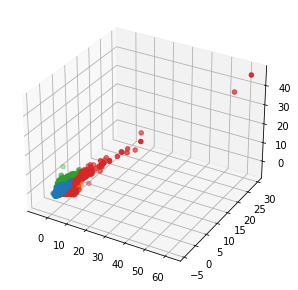

In [ ]:
kmeans = KMeansl2(4)
kmeans.train(x)
classes = kmeans.predict(x)
print(classes)
print(kmeans.centroids)
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[classes == 0,0],x[classes == 0,1],x[classes == 0,2])
ax.scatter(x[classes == 1,0],x[classes == 1,1],x[classes == 1,2])
ax.scatter(x[classes == 2,0],x[classes == 2,1],x[classes == 2,2])
ax.scatter(x[classes == 3,0],x[classes == 3,1],x[classes == 3,2])

In [ ]:
df2=pd.DataFrame(x)
df2['label']=classes
df2

0         1         2  label
0      2.346543  0.346441 -3.028503      3
1      1.761367  0.438124 -2.151692      3
2      2.330312 -0.126208 -2.236715      3
3      1.537078 -0.810004 -2.019956      3
4      1.416914 -1.121116 -1.493024      3
...         ...       ...       ...    ...
20635  0.602464 -2.251757  0.910737      0
20636  1.264302 -1.815928  1.016440      0
20637  0.687380 -2.056770  0.948383      0
20638  0.828435 -2.073240  0.954093      0
20639  0.771440 -1.832743  0.880292      0

[20640 rows x 4 columns]

In [ ]:
print(x[classes == 0])
print(x[classes==1])
print(x[classes==2])
print(x[classes==3])

[[ 1.02371812 -1.5030926  -1.33771751]
 [ 0.81925324 -1.46316665 -1.45864205]
 [ 0.72817309 -1.7154812  -0.92839959]
 ...
 [ 0.68738046 -2.0567699   0.94838264]
 [ 0.82843475 -2.07324029  0.95409328]
 [ 0.77143988 -1.83274305  0.88029193]]
[[ 1.26490818  1.1658516  -1.04809243]
 [ 0.4549865   0.47045511 -0.43666885]
 [ 0.42613101  0.36892276 -0.34492981]
 ...
 [ 0.44359722  2.23263574 -0.95532694]
 [ 0.14951832  1.37377989 -0.38272128]
 [ 0.26945539  1.9592097  -0.44071288]]
[[ 0.3288967   0.39540789 -0.02704442]
 [ 0.80758972  0.46164549  0.31170954]
 [-1.0100722  -1.45007258  1.37944135]
 ...
 [-0.23624721  0.97780256 -0.17563256]
 [-0.19352     0.9372352  -0.00508112]
 [-0.6255614   0.15345127 -0.87039011]]
[[ 2.34654276  0.34644059 -3.02850342]
 [ 1.76136708  0.43812372 -2.15169173]
 [ 2.33031157 -0.12620806 -2.23671518]
 ...
 [ 1.31480938 -0.36474266 -0.63755437]
 [ 1.40394419 -0.99230358 -0.83439691]
 [ 1.69695508 -0.77698331 -0.84439948]]


[2 2 2 ... 0 0 0]
[[ 0.6284283  -1.56822731  0.23437623]
 [11.98151155  5.17277331  8.83859533]
 [ 1.48193972 -0.3327699  -1.54531544]
 [ 0.117655    1.85504429 -1.03829087]
 [-1.01119269  0.45529188  0.59661759]]


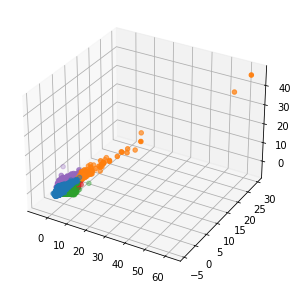

In [ ]:
kmeans = KMeansl2(5)
kmeans.train(x)
classes = kmeans.predict(x)
print(classes)
print(kmeans.centroids)
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[classes == 0,0],x[classes == 0,1],x[classes == 0,2])
ax.scatter(x[classes == 1,0],x[classes == 1,1],x[classes == 1,2])
ax.scatter(x[classes == 2,0],x[classes == 2,1],x[classes == 2,2])
ax.scatter(x[classes == 3,0],x[classes == 3,1],x[classes == 3,2])
ax.scatter(x[classes == 4,0],x[classes == 4,1],x[classes == 4,2])

In [ ]:
df2=pd.DataFrame(x)
df2['label']=classes
df2

0         1         2  label
0      2.346543  0.346441 -3.028503      2
1      1.761367  0.438124 -2.151692      2
2      2.330312 -0.126208 -2.236715      2
3      1.537078 -0.810004 -2.019956      2
4      1.416914 -1.121116 -1.493024      2
...         ...       ...       ...    ...
20635  0.602464 -2.251757  0.910737      0
20636  1.264302 -1.815928  1.016440      0
20637  0.687380 -2.056770  0.948383      0
20638  0.828435 -2.073240  0.954093      0
20639  0.771440 -1.832743  0.880292      0

[20640 rows x 4 columns]

In [ ]:
print(x[classes == 0])
print(x[classes==1])
print(x[classes==2])
print(x[classes==3])
print(x[classes==4])

[[ 0.72817309 -1.7154812  -0.92839959]
 [ 0.53691626 -1.87736573 -0.40096561]
 [ 0.66465273 -1.67068893 -0.98101466]
 ...
 [ 0.68738046 -2.0567699   0.94838264]
 [ 0.82843475 -2.07324029  0.95409328]
 [ 0.77143988 -1.83274305  0.88029193]]
[[10.38572208  3.84162782  7.32139039]
 [15.59246761  4.82825147 12.19601703]
 [10.32129759  4.03051867  6.80306408]
 [10.25388264  3.75520678  7.63611657]
 [12.76453222  4.94498499  9.48559415]
 [20.14590164  8.49633362 15.46992242]
 [ 9.77951694  3.38490016  7.32267573]
 [16.39866744  6.51166529 11.91322858]
 [ 7.01394722  2.61792731  3.60245925]
 [21.65427422  9.7367134  14.14273154]
 [23.96357472 11.32199523 14.64229711]
 [56.39837798 27.49757863 37.93509313]
 [14.66787745  5.30187356 11.81835064]
 [14.2824208   5.55013784 10.51980802]
 [62.43488943 29.55318601 46.31802018]
 [ 9.87624724  3.91587236  7.36475189]
 [19.70207504  9.1895156  14.42435044]
 [ 9.11328368  3.65839628  6.81336762]
 [10.84921821  5.16114917  7.45468536]
 [ 6.34626179  2.65